# Digitise, Optimise, Visualise

## USI Lugano, July 2019

# About your instructor

Piotr Orłowski,
Assistant Professor of Finance, HEC Montréal

piotr.orlowski@hec.ca

# Motivating Problem #1

# Big bucks

League of Legends is a multiplayer videogame with a large online following. In the last World Championship the total prize pool, divided among the top three teams, was 3.7m $.

In [74]:
%matplotlib inline
from IPython.display import YouTubeVideo
YouTubeVideo('mb83bNsH9f4?t=146', width = 700, height = 700 * 9/16)

# Decisions

LoL players have to make two kinds of decisions: the split-second choices you see in the above video, based on reflex and dexterity, and decisions to best allocate the resources they have.

## Objective #1

Do not get killed.

## The Math of not getting killed

Toughness depends on two parameters: `health` (`H`) and `armor` (`A`).

They determine how much damage (`D`) you can soak up.
`armor` mitigates `damage`, which is applied to `health`.

Once `health` drops to zero, it's game over.

The formula for damage mitigation is
$$
    \Delta H(D) = \frac{100}{100 + A} \times D
$$

## The Math of not getting killed

From this we can calculate an `effective health` indicator: how much single-blow damage can your character survive given their pool of `(health, armor)`.

To do this, given initial health $H_0$, solve for $D$ such that 
$$
    H_0 - \frac{100}{100 + A} \times D = 0
$$
which gives
$$
    D^{\star} = H_0 \times \frac{A + 100}{100},
$$

## Effective health

### The objective function
$$
    EH(H,A) := H \times \frac{A + 100}{100}
$$

`effective health` is a function of two variables.

As a player, you choose levels of $H$ and $A$ so that your `effective health` goes as high as possible.

Let's take a look at this function.

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm
import pylab

In [61]:
def effective_health( health , armor ):
    return health * 1.0/100.0 * (100.0 + armor)

In [62]:
health_points = np.linspace( 1 , 2000 , num = 100 )
armor_points = np.linspace( 1 , 200 , num = 100 )

health_grid, armor_grid = np.meshgrid(health_points, armor_points)

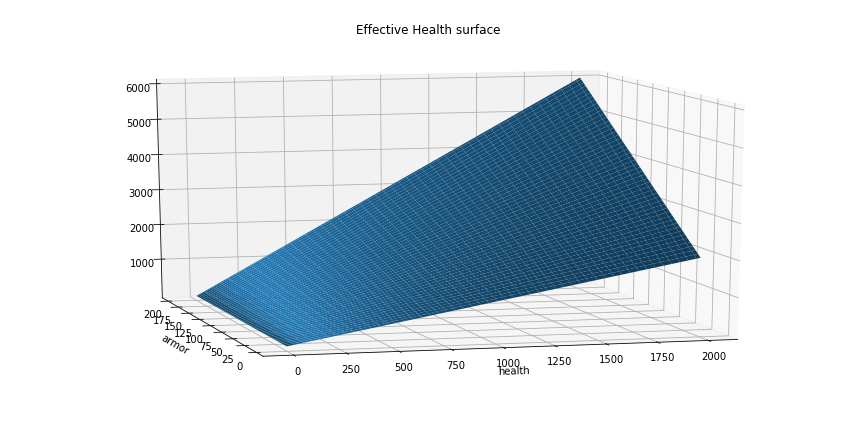

In [63]:
effective_health_calc = effective_health(health_grid, armor_grid)
fig = plt.figure()
ax = fig.gca(projection = '3d')
ax.view_init(azim = -105, elev = 12)
ax.set_xlabel('health')
ax.set_ylabel('armor')
ax.set_title('Effective Health surface')
surf = ax.plot_surface(health_grid, armor_grid, effective_health_calc)
fig.set_size_inches(12,6)
fig.tight_layout()

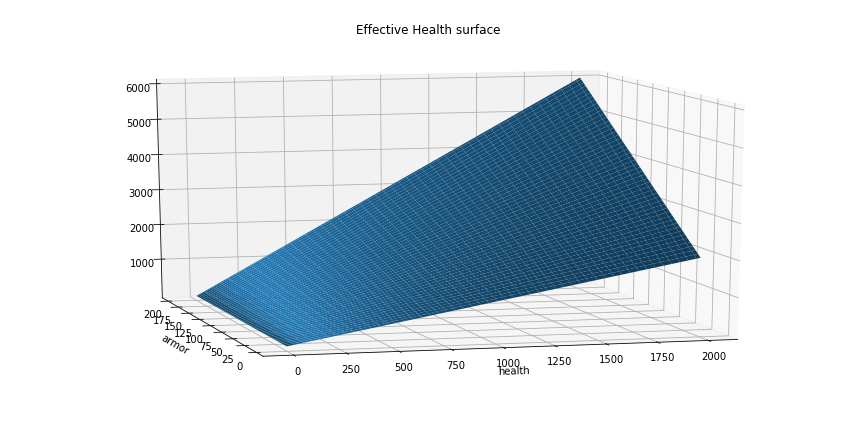

In [64]:
fig

# About Effective Health

## How would you set $H$ and $A$?

# About Effective Health

## The right answer:
$$
H = \infty \quad \quad A = \infty
$$

... will draw the ire of the cheat police.


Gameplay would not be very interesting anyway.

# Decisions

## What makes the problem interesting are limits on resources.

### The budget constraint.

Consider maximising
$$
    EH(H,A) := H \times \frac{A + 100}{100},
$$
knowing that you have a budget of $3600$, one unit of $H$ costs $2.5$, and one unit of $A$ costs $18$, i.e.
$$
    2.5 \times H + 18 \times A \leq 3600.
$$

## Any ideas?

#### Hint: you probably have seen such problems

# Graphical intuition about a simple optimisation problem

In the following slides, we will build some intuitions which will later help us understand the mathematics of optimisation.

We will also understand why this problem is **easy**.

We will wait with the formal introduction of the necessary concepts, with a mathematical treatment of our intuition, and with the computer implementation of the problem until later this week.

# Visualisation of budget constraint

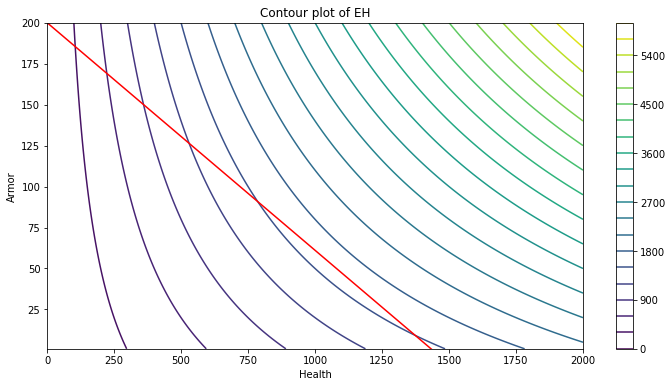

In [66]:
contour_fig, contour_ax = plt.subplots()

target_image = contour_ax.contour(health_points, armor_points, effective_health_calc, 22)
contour_fig.colorbar(target_image, orientation = 'vertical')

bottom, top = contour_ax.get_ylim()

budget_constraint = (3600.0 - 2.5 * health_points) / 18.0

contour_ax.plot(health_points, budget_constraint, 'r', label = 'budget constraint')
contour_ax.set_ylim(bottom, top)

contour_ax.set_title("Contour plot of EH")

contour_ax.set_xlabel('Health')
contour_ax.set_ylabel('Armor')

contour_fig.set_size_inches(12,6)

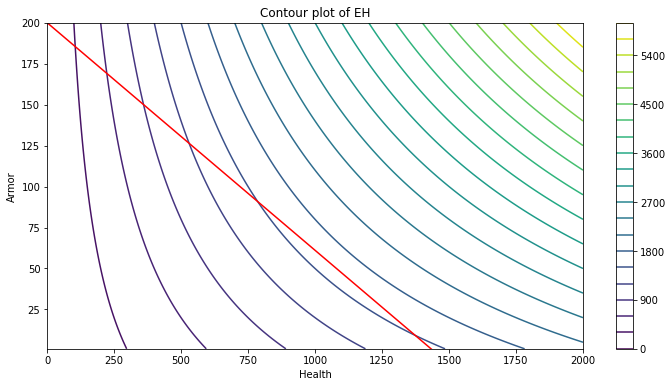

In [67]:
contour_fig

# Intuition number one: direction of increase

We noticed that this function increases in $A$ and $H$.

Think about a given point in its domain $(H_0, A_0)$.

We know that for a tuple of very small positive numbers $(h,a)$, $EH(H_0, A_0) \leq EH(H_0 + h, A_0 + a)$, but not all choices of $(h,a)$ are equal.

The choice for which $EH(H_0 + h, A_0 + a)$ increases fastest at every point $(H_0, A_0)$ is called the **gradient**.

**The gradient** is always orthogonal (perpendicular) to the contours.
- even if it does not seem so in this graph (aspect ratios)

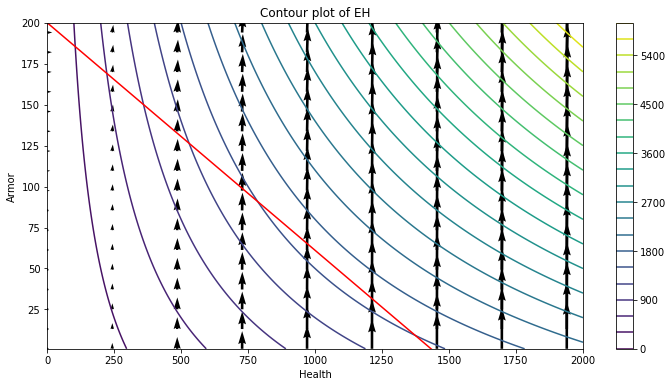

In [68]:
effective_health_calc_grad = effective_health(health_grid[0:health_grid.shape[0]:12, 0:health_grid.shape[1]:80]
                                              , armor_grid[0:armor_grid.shape[0]:12, 0:armor_grid.shape[1]:80])

# Redo the contour plot
quiver_fig, quiver_ax = plt.subplots()

target_image = quiver_ax.contour(health_grid, armor_grid, effective_health_calc, 22)

quiver_fig.colorbar(target_image, orientation = 'vertical')

bottom, top = quiver_ax.get_ylim()

budget_constraint = (3600.0 - 2.5 * health_points) / 18.0

quiver_ax.plot(health_points, budget_constraint, 'r', label = 'budget constraint')


quiver_ax.set_title("Contour plot of EH")

quiver_ax.set_xlabel('Health')
quiver_ax.set_ylabel('Armor')

# Calculate the gradient of the EH function
dh, da = np.gradient(effective_health_calc)
dh = (armor_grid + 10.0)/10.0
da = health_grid/10.0

# Choose sparser results for plotting the gradient field
# y_step = 12
# x_step = 80

# Subset dh and da arrays
# dh = dh[0:dh.shape[0]:y_step, 0:dh.shape[1]:x_step]
# da = da[0:da.shape[0]:y_step, 0:da.shape[1]:x_step]

# # Add to plot
# quiver_ax.quiver(health_grid[0:health_grid.shape[0]:y_step, 0:health_grid.shape[1]:x_step]
#            , armor_grid[0:armor_grid.shape[0]:y_step, 0:armor_grid.shape[1]:x_step]
#            , dh
#            , da)

quiver_ax.quiver(health_grid[0::6, 0::12]
                 , armor_grid[0::6, 0::12]
                 , dh[0::6, 0::12]
                 , da[0::6, 0::12]
#                  , units = 'xy'
                 , angles = 'xy'
                 , pivot = 'tail')
                    
quiver_ax.set_ylim(bottom, top)

quiver_fig.set_size_inches(12,6)

# The gradients are orthogonal even if they do not look the part -- look at the units on both axes
# (of course, we could redefine everything to look nice -- how would you modify the code?)

# "Quiver plot": gradients on the contour

**The gradient** is always orthogonal (perpendicular) to the contours.
- even if it does not seem so in this graph (aspect ratios)

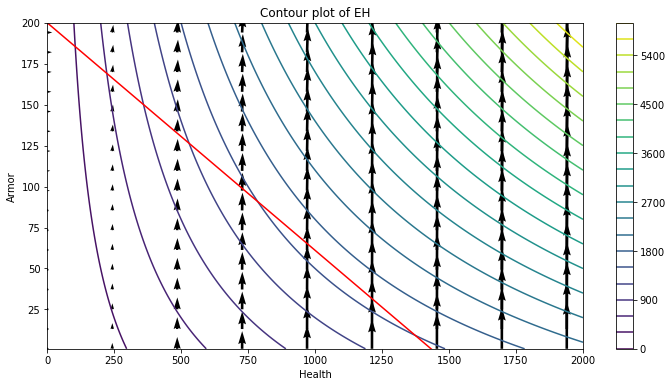

In [69]:
quiver_fig

# Intuition number two: Moving along the gradient

### Good idea: follow the gradient

- the function increases fastest in this direction

### But at some point you run into the budget constraint!

### What then?

- Let's plot the function along the budget constraint
- Be careful: we have to redefine the function's arguments
- If we plot in $H$, we have to express $EH(H, A(H))$, where $A(H)$ comes from solving for $A$ as a function of $H$ in the budget constraint:
$$
    A(H) = \frac{3600 - 2.5\times H }{18}
$$
$$
    EH_{\text{constr}}(H, A(H)) = H\times \frac{A(H) + 100}{100}
$$

# Cross-section: along the budget constraint

- you've followed the gradient and it took you to the constraint
- well, what can you do?
    - move along the constraint
    
### At some point we will find that the gradient is 0
- hello optimum!
- this could happen inside the domain, too

Text(0.5, 1.0, 'EH along the budget constraint')

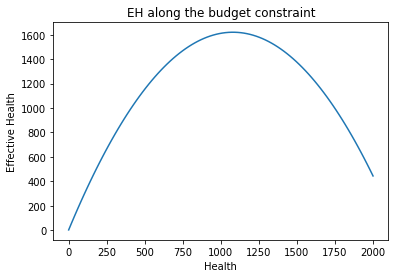

In [70]:
armor_from_constraint = budget_constraint

effective_health_cross_section = effective_health(health_points, armor_from_constraint)

fig_cx, ax_cx = plt.subplots()
ax_cx.plot(health_points[effective_health_cross_section >= 0], effective_health_cross_section[effective_health_cross_section >= 0])

ax_cx.set_xlabel('Health')
ax_cx.set_ylabel('Effective Health')
ax_cx.set_title('EH along the budget constraint')

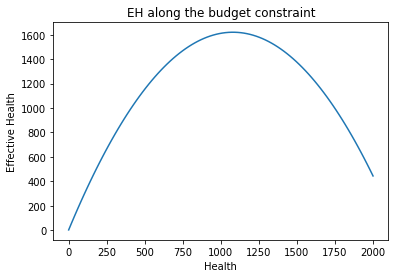

In [71]:
fig_cx

# A hard optimisation problem

### The rastrigin function and how the previous method will fail
- bivariate function
- everywhere differentiable
    - but just take a look...
    
$$
    f(x) = 20 + x_1^2 - 10 \cos(2\pi x_1) + x_2^2 - 10 \cos(2\pi x_2)
$$

- let's have $x_i \in [-5.12,\,\, 5.12]$
- global minimum at $x = (0\,\,0)$  with $f(x)=0$

# What would happen if we followed the gradient?

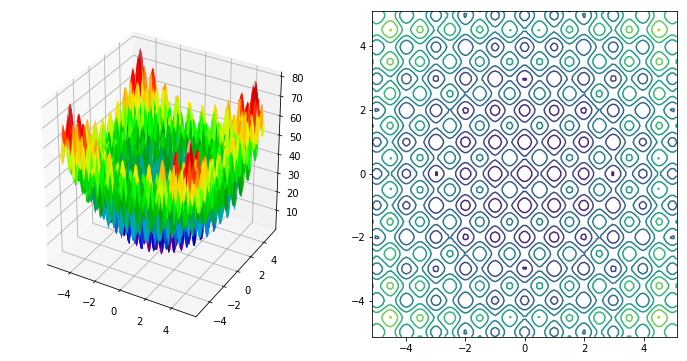

In [72]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import cm 
from mpl_toolkits.mplot3d import Axes3D 
 
X = np.linspace(-5.12, 5.12, 100)     
Y = np.linspace(-5.12, 5.12, 100)     
X, Y = np.meshgrid(X, Y) 

Z = (X**2 - 10 * np.cos(2 * np.pi * X)) + \
  (Y**2 - 10 * np.cos(2 * np.pi * Y)) + 20
 
fig_rs = plt.figure(figsize=(12,6))
ax = fig_rs.add_subplot(1, 2, 1, projection='3d') 
ax.plot_surface(X, Y, Z,
  cmap=cm.nipy_spectral, linewidth=0.08,
  antialiased=True)
ax_2=fig_rs.add_subplot(1, 2, 2)
ax_2.contour(X,Y,Z)
# plt.savefig('rastrigin_graph.png')

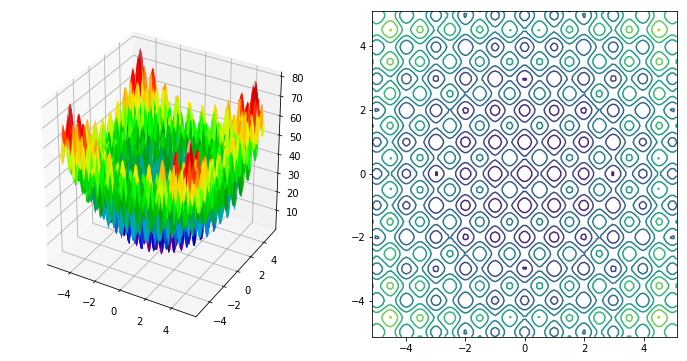

In [73]:
fig_rs

# Optimisation problems

### Our focus is on making the best decision possible

### In order to make a good decision, we have to correctly formulate the problem
- We will now give mathematical notation for an optimisation problem ...
- ... and we will interpret its components

# Optimisation problems

### Structuring problems
- Our goal is to solve problems that could occur in real life
- Finding a mathematical abstraction of a problem is 25% of the job

### Example: Effective Health
- We want our hero to be a tough nut to crack
- First, we had to define what it means to be **tough**
- Then, we identified what decisions we can make to make them tough
- Then, we translated it into a mathematical function
- Then, we found what decisions we can take within our budget
- Then, finally, we formulated our optimisation problem

# Optimisation problems

### We could write it compactly as:

$$
    \min_{(H, A) \in C \subseteq R^2} EH(H,A)
$$
$$
    C = \{(H,A): 2.5 \times H + 18 \times A \leq 3600 \}
$$

- $(H,A)$: decision
- $EH(H,A)$: objective function
- $C$: feasible set

# Optimisation problems

### Structuring problems
- Effective health seems easy: we found a formula on the game's wiki
- It was a convex problem

### Was it the right problem to solve?
- Is EH the right measure of **toughness**?
- What if we face opponents who deal smaller amounts of damage over longer periods?
- ... and Armor depletes as well?
- We would have to solve a different problem

$$
    \min_{x \in C \subseteq R^n} g(x)
$$

- $x$: decision vector, an abstraction of actions that we can take
- $g(x)$: objective function
- $C$: feasible set

# Optimisation problems

### Finding the right problem to solve is half the job

### Example: portfolio selection

- You have 1m CHF
- You can invest it in a stock fund or a bond fund, or leave it in your bank account

### What is the right problem to solve?

- maximise Sharpe ratio?
- maximise expected utility?
- minimise expected drawdowns?

### What does it mean, optimal?

### Keep this in mind!

# Mathematical notation

$$
    \min_{x \in C \subseteq R^n} g(x)
$$

- $x$: decision vector, an abstraction of actions that we can take
- $g(x)$: objective function
- $C$: a set in $R^n$
    - this is very compact notation, but hard to operationalise


# Mathematical notation

$$
    \begin{eqnarray}
        & \min_{x} f(x) \\
        \text{subject to} & \\
        & h_1 (x) \leq 0 \\
        & \ldots \\
        & h_n (x) \leq 0 \\
        & g_1 (x) = 0 \\
        & \ldots \\
        & g_m (x) = 0 \\
    \end{eqnarray}
$$

### Elements of an optimisation problem

- $x$: decision vector, an abstraction of actions that we can take
- $f(x)$: objective function, the measure of success
- We described the set $C$ with $n$ inequalities and $m$ equalities

### Minimise or maximise?
There is no difference: minimising $f(x)$ is equivalent to maximising $-f(x)$ and vice versa!

- we maximised $EH$
- but we could have minimised $-EH$

# Easy and Hard problems

### Two examples
- EH vs Rastrigin

### What determines hardness?
- shape of objective
- shape of feasible set

# Convex problems

### Convex problems are easy
- Optimal solution always exists
- And **is unique**

### What does convex mean?
- Objective function must be convex
- Feasible set must be convex

#### Convex function:
- Intuitively, think about something bowl-shaped

#### Convex set:
- Intuitively, think of something bun-shaped
    - not a pretzel!

# Next on Digitise, Optimise, Visualise

## Convex sets
## Convex functions

## Optimisation and duality

## Applications:
- Portfolio optimisation
    - various criteria
    - various constraints
- Regression
    - penalisation vs OLS
    - prediction with many regressors
- Machine learning
    - Support Vector Machines
    - the Kernel Trick